# Regresion Logistica

- problemas de clasificacion
- probabilidades de suceda algo entre 0 o 1
- sigmoide sirve para decisiones binarias con 2 parametros 
- softmax para uso de mas parametros dentro de la clasificacion
- Cambia tambien el loss function
- Loss implementa el logaritmo

In [ ]:
import torch 
import numpy as np
# modulos de redes neuronales 
import torch.nn as nn
# modulo de optimizaciones
import torch.optim as optim

import matplotlib.pyplot as plt

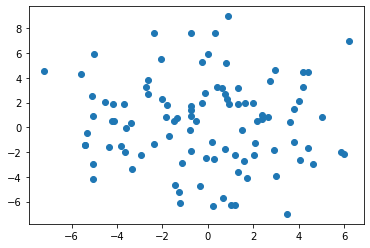

In [ ]:
n = 100
h  = n // 2
dimen = 2

data = np.random.randn(n, dimen)*3
plt.scatter(data[:,0], data[:,1])


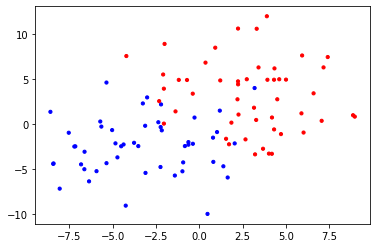

In [ ]:
data[:h, :] = data[:h, :] - 3 *np.ones((h, dimen))
data[h:, :] = data[h:, :] + 3 *np.ones((h, dimen))
colors = ["blue", "red"]
color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=10)


In [ ]:
target = np.array([0]*h + [1]*h).reshape(n, 1)
x = torch.from_numpy(data).float().requires_grad_(True)
y = torch.from_numpy(target).float()
x.shape, y.shape



(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.2105, grad_fn=<BinaryCrossEntropyBackward>)

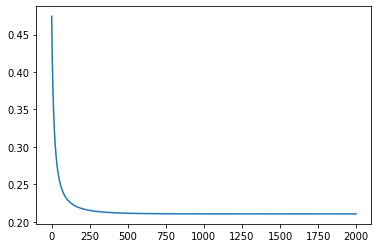

In [ ]:
model  = nn.Sequential(
            nn.Linear(2, 1),
            nn.Sigmoid()
          )
loss_func = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []
ite = 20
00

for i in range(ite):
  result = model(x)
  loss = loss_func(result, y)
  losses.append(loss.data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


plt.plot(range(ite), losses)
loss


In [ ]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])


red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])



blue
red


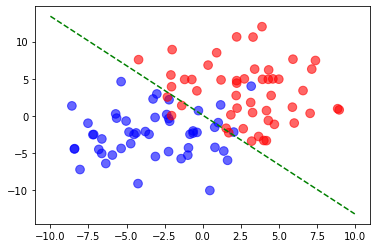

In [ ]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis * w0[0][0] / w0[0][1])
plt.plot(x_axis, y_axis, "g--")